<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_8/8_2_imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification 


---

Doing slick AI and Machine Learning doesn't have to be difficult. ResNet-50 is a **pre-trained** deep learning model that can be used for image classification tasks. With ResNet-50, you don't need to start from scratch when building a classifier model and making predictions. In fact for most classification tasks you can likely find a pre-trained model so you don't have to re-invent the wheel!  In this lesson, we will jump right into image classification with ResNet-50, including an introduction to the model and a simple tutorial on how to use it for image classification with Python.

> NOTE: you can change your colab runtime to GPU:  Runtime > Change Runtime Type > Hardware Accelerator > GPU


## About ResNet50

![RESNET50](https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_8/img/resnet50.jpg)

[resnet50-paper](https://arxiv.org/pdf/1512.03385.pdf)


ResNet-50 is a type of convolutional neural network (CNN) that has been trained on millions of images. It was developed by Microsoft Research Asia and won the first place in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2015. The ResNet-50 architecture is based on the residual network approach, which helps to mitigate the vanishing gradient problem that can occur with deep networks - a lot of words to basically say it addresses training issues.

To get started with ResNet-50 in Python, we use the Keras library, which makes it easy to work with deep learning models. First, we import the necessary libraries including ResNet-50, image preprocessing and decoding functions, and the PIL library for image processing.

Then, we load the pre-trained ResNet-50 model and use it to predict the class of an image. To do this, we load the image and preprocess it using a few lines of Python code, and then pass it to the ResNet-50 model. Finally, we print out the top 3 predicted classes with their probabilities.

[Pre-Trained Models](https://keras.io/api/applications/#available-models)

## Step 1: Importing the necessary libraries

First step is to import the necessary libraries needed to classify the images. In this case you need to use numpy, keras and matplotlib.

> NOTE: you may need to install tensorflow and or upgrade keras before running the rest of the notebook! 

In [1]:
# may need to re-install tensorflow or keras 
#!pip install --upgrade tensorflow
#!pip install --upgrade keras


In [12]:
from IPython.display import display
import cv2
import numpy as np
import requests 
from urllib.request import urlopen
from io import BytesIO


# TensorFlow and Keras 
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, MobileNetV2 # Pre-Trained Models 
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array

# Python Image Library
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageOps, ImageEnhance


## Step 2: Load images into a dictionary 


---

We are given a set of URLs of images we want to "classifiy" so let's load them into a dictionary by downloading each one and adding them to a dictionary.

> **enumerate** is a built-in function that provides an easy way to iterate over a sequence or list while keeping track of the **index** or counter of the current item. This can be useful in many situations, such as when you need to modify a list or dictionary while iterating over it, or when you need to access the index of an item in a loop. By using enumerate, you can avoid the need to manually keep track of the index, which can simplify your code and make it easier to read and understand.

```python

fruits = ['apple', 'banana', 'orange', 'pear']

for index, fruit in enumerate(fruits):
    print(f'The fruit at index {index} is {fruit}.')

```

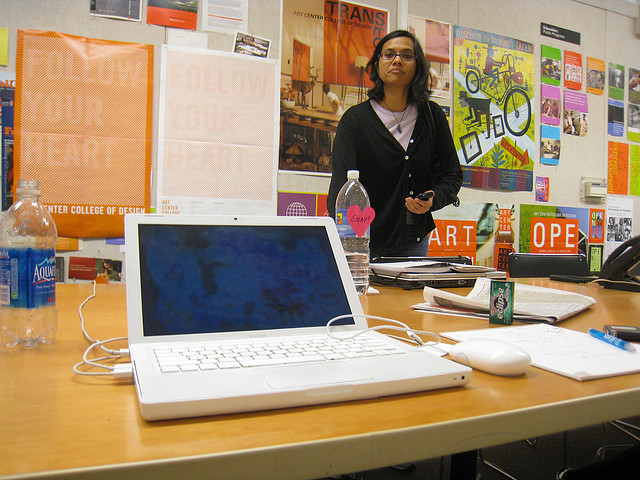

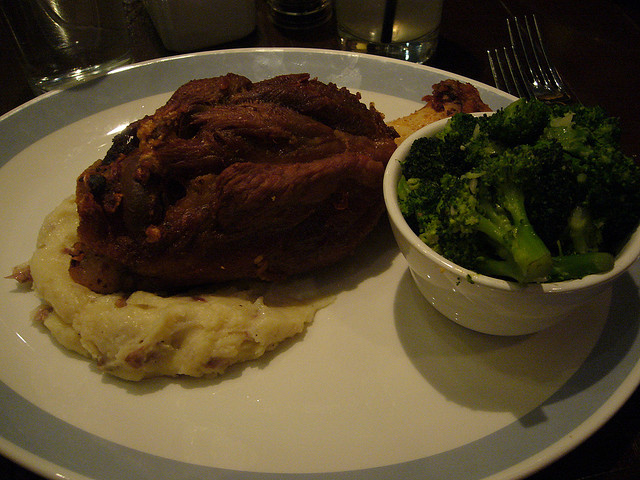

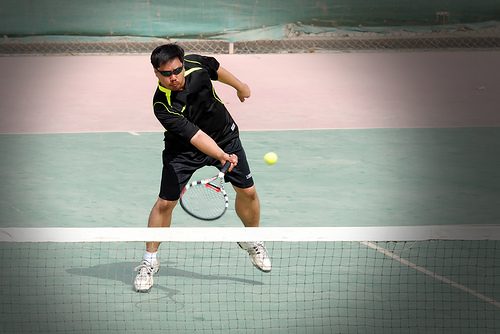

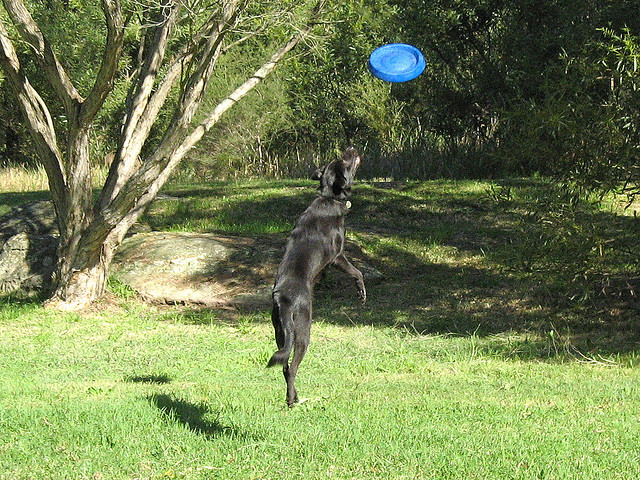

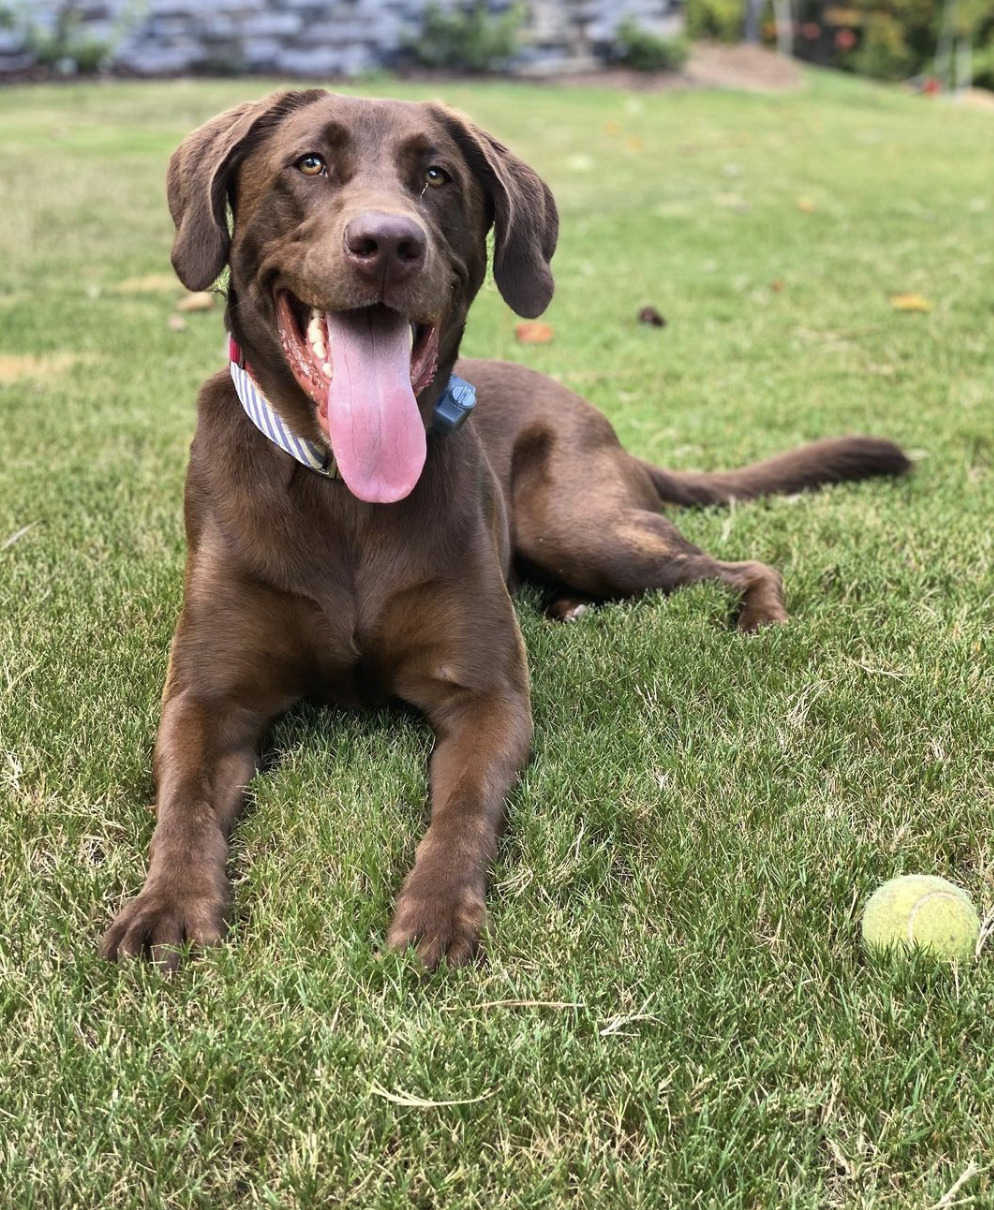

In [13]:
# dictionary to keep images in
image_dict = {}

# images to classify
uris = [
    'http://images.cocodataset.org/test-stuff2017/000000024309.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000028117.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000006149.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000004954.jpg',
    "https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_8/img/max_dog.jpg"
]


for img_index, url in enumerate(uris):
  # grab the image 
  response = requests.get(url)
  # open it 
  img = Image.open(BytesIO(response.content))
  # add it to a dictionary 
  image_dict[img_index] = img
  # display the image 
  display(img)



In [14]:
# eyeball the dictionary! 
image_dict

{0: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7F7448108070>,
 1: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7F74D631A100>,
 2: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334 at 0x7F7448130610>,
 3: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7F74481D4B80>,
 4: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=994x1210 at 0x7F7448329FD0>}

##  Step 3: Preprocessing images for ResNet-50


---

ResNet50 expects images to have a size of 224 X 224 X 3 ~ essentially 224 pixes wide X 244 pixes height by 3 colors! We have a dictionary of raw images we need to pre-process by resizeing them, that's easy to do. 


In [15]:
for image_index in image_dict.keys():
  # snag the image and resize it! 
  img = image_dict[image_index].resize((224, 224))
  # update the dictionary 
  image_dict[image_index] = img

# eyeball the result
image_dict

{0: <PIL.Image.Image image mode=RGB size=224x224 at 0x7F74481DC280>,
 1: <PIL.Image.Image image mode=RGB size=224x224 at 0x7F7448108070>,
 2: <PIL.Image.Image image mode=RGB size=224x224 at 0x7F74D631A100>,
 3: <PIL.Image.Image image mode=RGB size=224x224 at 0x7F7448108D00>,
 4: <PIL.Image.Image image mode=RGB size=224x224 at 0x7F74481D4B80>}

## Step 4: Download & Initalize the ResNet50 model 



---

For fun we'll print out the model summary which is way-too-much detail on the model architecture - essentially layer after layer. you don't need to worry about this. 



----
The thing i want you to put a book mark on is the number of total parameters : 
- Total params: 25,636,712
- Trainable params: 25,583,592
- Non-trainable params: 53,120

Basically more parameters = more learning. 

In [16]:
# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Print the model architecture
print(model.summary())


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

## Step 5: Make a prediction using the ResNet-50 model in Keras

After preprocessing the image you can start classifying by simply instantiating the ResNet-50 model.

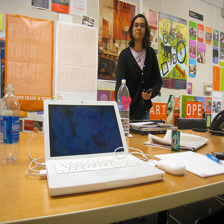

1/1 [==============================] - 1s 1s/step
desk : 0.5906548
notebook : 0.14810245
laptop : 0.07998593


In [17]:
# grab the first image 
img = image_dict[0]
display(img)
# Convert the image to an array and preprocess it
img_array = img_to_array(img)
img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))
img_array = preprocess_input(img_array)

# Use the model to predict the class of the image
preds = model.predict(img_array)
predictions = decode_predictions(preds, top=3)[0]

# Print the top 3 predictions
for pred in predictions:
    print(pred[1], ':', pred[2])


## Step 6: Make a Function! 


---

so that's a lot of code to make a prediction lets make our life easier and craft a image classifier function: "classify_image". this function will simply take a resized image in and will return a prediction. 

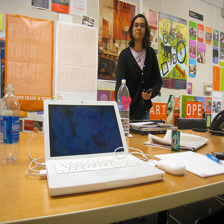

1/1 [==============================] - 0s 28ms/step
this image likely contains:
 - desk (59.07%) 
 - notebook (14.81%) 
 - laptop (8.00%) 


('n03179701', 'desk', 0.5906548)

In [19]:
def classify_image(img):
  # display the image  
  display(img)
  # Convert the image to an array and preprocess it
  img_array = img_to_array(img)
  img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))
  img_array = preprocess_input(img_array)

  # Use the model to predict the class of the image
  preds = model.predict(img_array)
  try:
    
    predictions = decode_predictions(preds, top=3)[0]
    # Print the top 3 predictions
    print("this image likely contains:")
    for pred in predictions:
      print(" - {} ({:.2f}%) ".format(pred[1],pred[2]*100))
  except:
    predictions = decode_predictions(preds, top=1)[0]
    print("this image likely contains:")
    print(predictions)



  return predictions[0]

# test it out
classify_image(image_dict[0])

## Step 7: Loop over it


---

So we have a dictionary of images we are intersted in let's now loop over each image. 




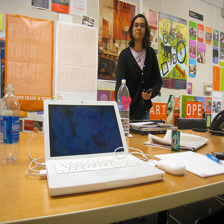

1/1 [==============================] - 0s 27ms/step
this image likely contains:
 - desk (59.07%) 
 - notebook (14.81%) 
 - laptop (8.00%) 


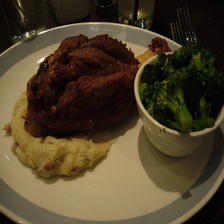

1/1 [==============================] - 0s 46ms/step
this image likely contains:
 - mashed_potato (77.95%) 
 - broccoli (14.53%) 
 - plate (4.07%) 


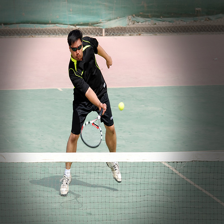

1/1 [==============================] - 0s 27ms/step
this image likely contains:
 - racket (70.44%) 
 - tennis_ball (21.64%) 
 - ping-pong_ball (6.69%) 


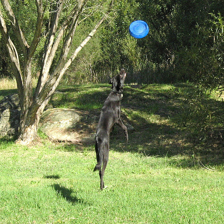

1/1 [==============================] - 0s 26ms/step
this image likely contains:
 - wallaby (32.94%) 
 - Scottish_deerhound (19.52%) 
 - soccer_ball (14.15%) 


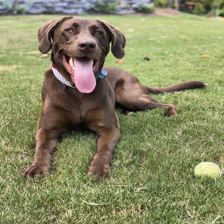

1/1 [==============================] - 0s 44ms/step
this image likely contains:
 - Chesapeake_Bay_retriever (89.22%) 
 - Weimaraner (3.64%) 
 - vizsla (3.20%) 


In [20]:
for image_index in image_dict.keys():
  classify_image(image_dict[image_index])


## Another Pre-Trained Classifier 


---

## About MobileNetV2()

MobileNetV2 is a neural network architecture designed for efficient mobile and embedded vision applications. It was developed by **Google researchers** as an extension of the original MobileNet architecture with the goal of improving both accuracy and efficiency.

MobileNetV2 has achieved state-of-the-art results on a variety of image classification and object detection benchmarks while requiring significantly fewer parameters and computations compared to other state-of-the-art models. This makes it well-suited for **resource-constrained environments** such as mobile devices and embedded systems.

MobileNetV2 is available in several pre-trained versions that can be fine-tuned on custom datasets or used as feature extractors for transfer learning. In this way, MobileNetV2 has become a popular choice for a wide range of computer vision applications.



---
Compare the MobileNetV2 parameters to ResNet50: 


- Total params: 3,538,984
- Trainable params: 3,504,872
- Non-trainable params: 34,112

Fewer parameters likely means less prediction performance. 


In [21]:
# Load the MobileNetV2 pre-trained model
model_MobileNetV2 = tf.keras.applications.MobileNetV2()
# Print the model architecture
print(model_MobileNetV2.summary())

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [22]:
# Define the URL of the image file on GitHub
url = "https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_8/img/max_dog.jpg"
# Display the image in the Colab notebook
img = Image.open(urlopen(url))


# Load the image and preprocess it
img = img.resize((224, 224))
img = np.asarray(img, dtype=np.float32)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.mobilenet_v2.preprocess_input(img)

# Make predictions on the image
predictions = model_MobileNetV2.predict(img)


# Decode the predictions
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions)

# Print the top 5 predictions
for pred in decode_predictions[0][:5]:
    print(f"{pred[1]} - {pred[2]*100:.2f}%")


1/1 [==============================] - 1s 1s/step
Chesapeake_Bay_retriever - 45.95%
vizsla - 12.56%
Weimaraner - 6.80%
German_short-haired_pointer - 3.72%
Labrador_retriever - 3.25%
